# Task 1: Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import os
os.chdir("/content")

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:28<00:00, 53.0MB/s]
100% 2.29G/2.29G [00:28<00:00, 86.0MB/s]


In [ ]:
!unzip -u "/content/chest-xray-pneumonia.zip" -d "/content/chest-xray-pneumonia"

In [ ]:
data = []
base_path = "/content/chest-xray-pneumonia/chest_xray/train"


for label in os.listdir(base_path):
    label_path = os.path.join(base_path, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            data.append({"image_path": img_path, "label": label})

df = pd.DataFrame(data)

In [ ]:
df.head()

,image_path,label
0,/content/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
1,/content/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
2,/content/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
3,/content/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
4,/content/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA


Images with label: NORMAL


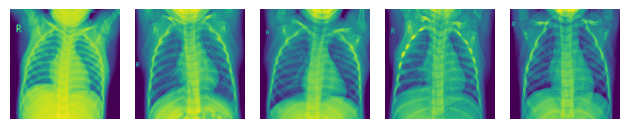


Images with label: PNEUMONIA


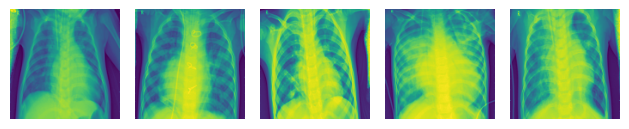

In [ ]:
def plot_images_by_label(df, label, num_images=5):
    images = df[df['label'] == label]['image_path']
    print(f"Images with label: {label}")
    for i in range(num_images):
        image_path = images.iloc[i]
        image = Image.open(image_path)
        image = image.resize((128, 128))
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images_by_label(df, 'NORMAL')
print()
plot_images_by_label(df, 'PNEUMONIA')

# Task 2: Dimensionality Reduction

In [ ]:
image_features = []
for i in range(len(df.index)):
    features = df.iloc[i]
    image = Image.open(features['image_path'])
    image = image.resize((64, 64)).convert('L')
    image_array = np.array(image).flatten()
    image_features.append(image_array)

image_features = np.array(image_features)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_data_pca = pca.fit_transform(image_features)

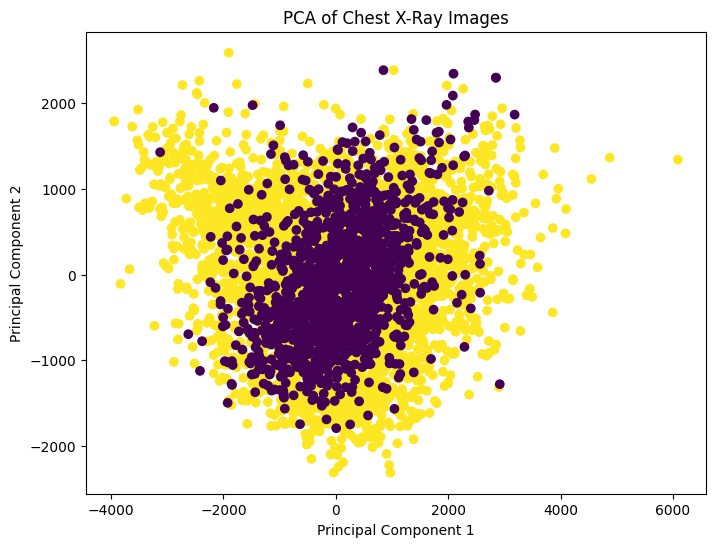

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_pca[:, 0], transformed_data_pca[:, 1], c=np.where(df['label'] == 'NORMAL', 0, 1))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Chest X-Ray Images')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
transformed_data_tsne = tsne.fit_transform(image_features)

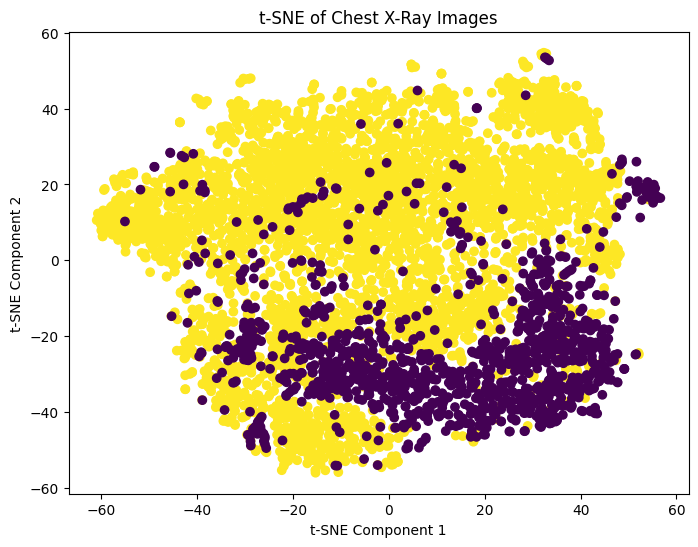

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_tsne[:, 0], transformed_data_tsne[:, 1], c=np.where(df['label'] == 'NORMAL', 0, 1))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Chest X-Ray Images')
plt.show()

# Task 3: Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

The reason we chose k as 2 lies in t-SNE. Dimensionality reduction using t-SNE yielded two clusters as can be seen from the plot above. PCA yielded one cluster that is almost unified, so it is not helpful.

Also, the dataset used for this task contains images labeled as either 'NORMAL' or 'PNEUMONIA' which implies that there are two distinct categories within the data.

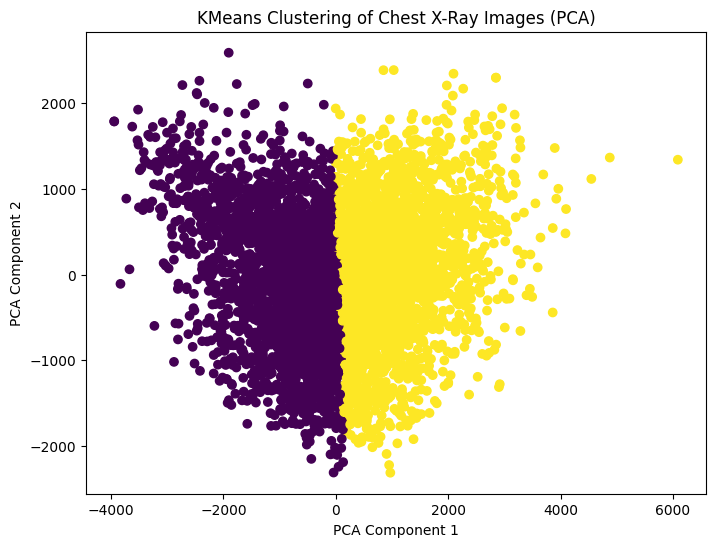

In [ ]:
kmeans.fit(transformed_data_pca)
cluster_labels_pca = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_pca[:, 0], transformed_data_pca[:, 1], c=cluster_labels_pca)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of Chest X-Ray Images (PCA)')
plt.show()

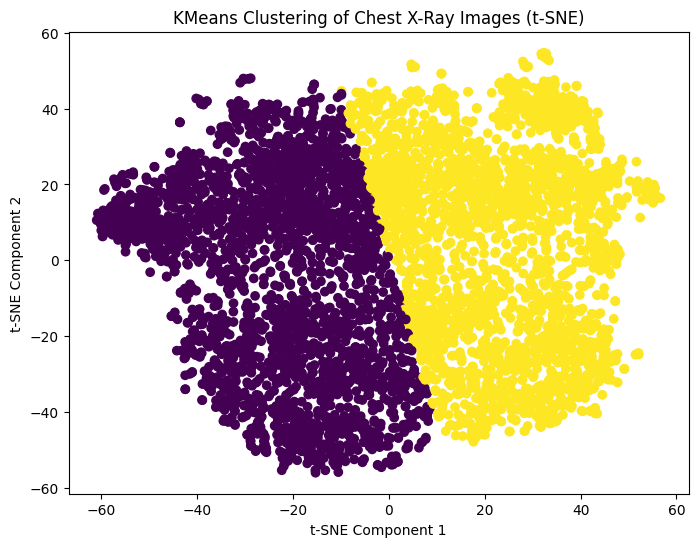

In [ ]:
kmeans.fit(transformed_data_tsne)
cluster_labels_tsne = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_tsne[:, 0], transformed_data_tsne[:, 1], c=cluster_labels_tsne)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('KMeans Clustering of Chest X-Ray Images (t-SNE)')
plt.show()

In [ ]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=2)

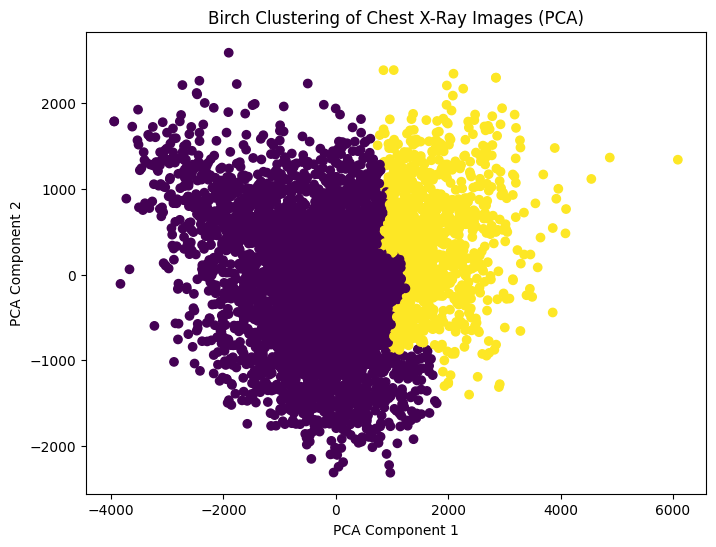

In [ ]:
birch_pca = birch.fit_predict(transformed_data_pca)

plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_pca[:, 0], transformed_data_pca[:, 1], c=birch_pca)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Birch Clustering of Chest X-Ray Images (PCA)')
plt.show()

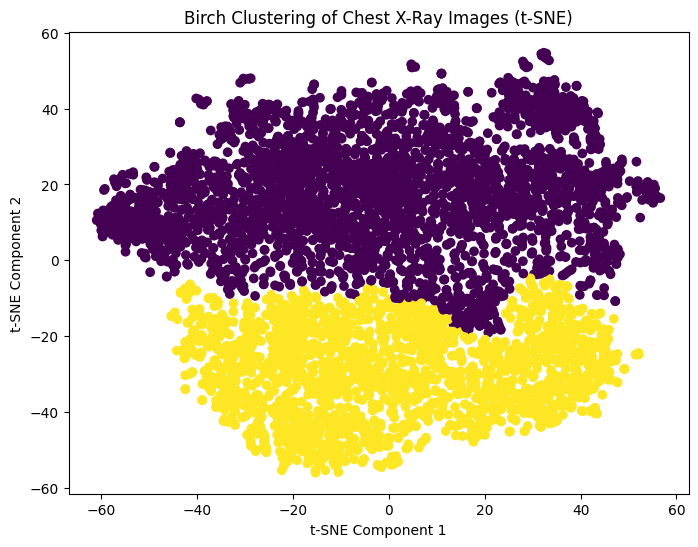

In [ ]:
birch_tsne = birch.fit_predict(transformed_data_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_tsne[:, 0], transformed_data_tsne[:, 1], c=birch_tsne)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Birch Clustering of Chest X-Ray Images (t-SNE)')
plt.show()

***Choice of Birch as the Second Clustering Algorithm*** <br>
We chose Birch as the second clustering algorithm due to its suitability for large datasets and its ability to handle closely packed data points efficiently. Birch builds a tree structure that incrementally clusters data and reduces the dataset into representative clusters. It is computationally efficient and particularly advantageous for datasets with:

    - Tightly packed clusters.
    - Minimal outliers.

Birch also handles large datasets effectively by reducing data into cluster representations, making it computationally efficient compared to K-Means Clustering. Birch optimizes cluster compactness and performs well when data points are closely packed, as was the case with the chest X-ray dataset after dimensionality reduction.

References:
- https://en.wikipedia.org/wiki/BIRCH
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html
- https://www.geeksforgeeks.org/ml-birch-clustering/

# Task 4: Implement the Query Mechanism

In [ ]:
random_number = np.random.randint(0, len(df))
random_image = df.iloc[random_number]
random_image = Image.open(random_image['image_path'])
random_image = random_image.resize((64, 64))
random_image = np.array(random_image).flatten()

In [ ]:
cluster_of_query_image = birch_tsne[random_number]

closest_3_images = []
for i in range(len(birch_tsne)):
    if i != random_number:
        distance = np.linalg.norm(transformed_data_tsne[i] - transformed_data_tsne[random_number])
        closest_3_images.append((distance, i))

closest_3_images.sort(key = lambda x:x[0])
closest_3_images = closest_3_images[:3]

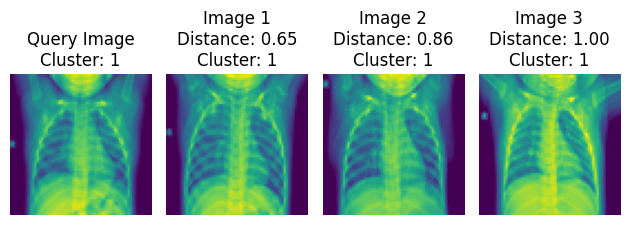

In [ ]:
plt.subplot(1,4,1)
plt.imshow(random_image.reshape(64, 64))
plt.axis('off')
plt.title(f"Query Image\nCluster: {birch_tsne[random_number]}")

i = 0
for distance, index in closest_3_images:
    image_path = df.iloc[index]['image_path']
    image = Image.open(image_path)
    image = image.resize((64, 64))
    plt.subplot(1,4,i+2)
    plt.imshow(image)
    plt.axis('off')
    image_cluster = birch_tsne[index]
    plt.title(f"Image {i + 1}\nDistance: {distance:.2f}\nCluster: {image_cluster}")
    i = i + 1


plt.tight_layout()
plt.show()

# Task 5: Evaluate Clustering and Query-Based Performance

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score

print(f"Homogeneity Score: {homogeneity_score(df['label'],   birch_tsne)}")
print(f"Completeness Score: {completeness_score(df['label'], birch_tsne)}")

Homogeneity Score: 0.25859327520986947
Completeness Score: 0.22021737920253104


In [ ]:
def precision_at_k(nearest_images, true_label, data, k=3):
    clusters = nearest_images[:k]
    num_of_relevants = 0
    for cluster in clusters:
        cluster_of_image = data[cluster[1]]
        if cluster_of_image == true_label:
            num_of_relevants += 1
    return num_of_relevants / k


def recall_at_k(nearest_images, true_label, data, k=3):
    clusters = nearest_images[:k]
    num_of_relevants = 0
    for cluster in clusters:
        cluster_of_image = data[cluster[1]]
        if cluster_of_image == true_label:
            num_of_relevants += 1

    num_of_total = 0
    for i in range(len(data)):
        if data[i] == true_label:
            num_of_total += 1

    return num_of_relevants / num_of_total

print("Precision@3:", precision_at_k(closest_3_images, cluster_of_query_image, birch_tsne))
print("Recall@3:", recall_at_k(closest_3_images, cluster_of_query_image, birch_tsne))

Precision@3: 1.0
Recall@3: 0.0014698677119059284


***Discussion***

**Clustering Evaluation:**
Clustering aims to group similar labels together. Homogeneity and completeness quantify how well the clustering aligns with the ground truth. These metrics provide direct feedback on the clustering algorithm's ability to separate and consolidate labels in the dataset. This is why we chose those metrics.

Homogeneity and completeness scores yielded values of approximately 0.25 and 0.22, respectively. These results suggest that the clusters formed by the algorithms do not strongly align with the true labels ("normal" and "pneumonia"). Specifically:

    - Homogeneity score measures whether each cluster contains only members of a single class. Since 0.25 is relatively low, it indicates that the clusters are not well-separated by labels. Our clustering algorithm struggles to group data points with the same label into the same cluster. This could mean the feature space does not sufficiently distinguish between classes or the algorithm's parameters need tuning.

    - Completeness score determines whether all members of a given class are placed in the same cluster. The completeness score of 0.22 reveals that many members of a true class are split across multiple clusters, indicating poor representation of true class structures. Our clustering algorithm has difficulty consolidating all samples of a label into a single cluster.


 The relatively low scores can be attributed to the close distance of the data points in the reduced feature space, as observed after dimensionality reduction. These distances likely led to difficulties in differentiating clear boundaries between clusters.

**Analysis and Insights**<br>
*Clustering Evaluation Insights*:
    
    - The relatively low homogeneity (0.25) and completeness (0.22) scores indicate that the clustering algorithm struggles to create well-defined clusters that align with the true labels. This suggests that the reduced feature space may not sufficiently capture the characteristics between "normal" and "pneumonia" classes.
    
    - Dimensionality reduction techniques like PCA and t-SNE might have compressed the data in a way that reduced separability, resulting in overlapping clusters.

<br><br>

 **Query Evaluation:**
 Query-based retrieval was evaluated using Precision@3 and Recall@3, chosen to measure the relevance and coverage of the top 3 retrieved results. These metrics provide insight into how well the system retrieves and ranks relevant images based on the query image's cluster.

**Precision@3** metric calculates the percentage of relevant items among the top-k results for a query. The Precision@3 score was consistently high, often reaching 1.0. This indicates that the top 3 retrieved images were almost always relevant to the query image's cluster. This strong performance suggests the following:

    - The clustering algorithm successfully grouped visually similar or feature similar images into the same cluster, making the nearest neighbors (top 3 retrieved images) highly relevant.
    
    - Precision@3 is a critical metric in this context because it reflects the system's ability to surface accurate and relevant results in the immediate vicinity of the query, which is essential for practical usability.

However, it is worth noting that the high Precision@3 score is heavily influenced by the tendency of closely packed data points in the reduced feature space to belong to the same cluster. This alignment, while beneficial for high precision, does not necessarily imply strong separability between true labels ("normal" and "pneumonia").

**Recall@3** measures the proportion of relevant items retrieved out of all relevant items in the dataset. The Recall@3 score was notably low, averaging approximately 0.0009. This low value highlights a significant limitation in the retrieval system:

    - Recall@3 measures the proportion of all relevant images (those in the same cluster as the query image) that were retrieved within the top 3 results. Given that the dataset contains a large number of images within each cluster, only retrieving 3 images limits the system's ability to capture all relevant images.

    - The low recall score stems from the fact that while the top 3 images are often correct (as reflected in the Precision@3 score), the system retrieves only a tiny fraction of all relevant images within the cluster. For example, if a cluster contains 1000 images similar to the query image, retrieving only 3 images results in a very small recall value (3/1000=0.003).

The combination of high Precision@3 and low Recall@3 reveals the following about the query-based system:

The system is highly accurate in selecting the most similar images but fails to capture the full scope of relevant images within the dataset.
This discrepancy can be attributed to the large cluster sizes and the limited retrieval scope (k = 3), which inherently restricts the recall metric.


**Analysis and Insights**<br>
*Query-Based Evaluation Insights:*

    - Strengths: The consistently high Precision@3 (1.0) highlights the system's strong ability to identify the most similar images to a query. This demonstrates that the clustering algorithms performed well in grouping visually or feature-similar images together within a cluster.

    - Limitations: The extremely low Recall@3 (0.0009) underscores a significant limitation: while the top 3 retrieved images are relevant, the system retrieves only a tiny fraction of all possible relevant images.